!["HCI Banner Logos for ATU Sligo, the HCI Human capital initiative and Higher Education 4.0"](images/HCIBanner.png)

# Geometric Transformations

So far, all we have done is to make changes to the range of an image. i.e. We change the intensity values of the image. 
But we can also move pixels from one place to another.
Some general examples:

- Rotation
- Warping
- Enlarge/Reduce

 
## Mathematical Characterisation


- Translation - preserves orientation, length, angles, parallelism, straight lines.
- Rigid (Euclidean) - preserves length, angles, parallelism, straight lines.
- Similarity - preserves angles, parallelism, straight lines.
- Affine - preserves parallelism, straight lines.
- Projective - preserves straight lines






![](images/geometricTransforsms.png)
 

## Translation
The matrix for this is 

$$\begin{bmatrix}
                1      & 0  & t_x \\
                0       & 1  & t_y  \\
                0        & 0   & 1  
\end{bmatrix} $$   

or
               $$  \begin{bmatrix}
                \textbf{I} & \textbf{t} \\
                \textbf{0}^{\top}       & 1 
            \end{bmatrix} $$

or
    $$[ \textbf{I} |  \textbf{t}  ]_{2\times3}$$

Example: take the pixel at position $(2,3)$ and translate it 5 pixels on the x-axis and 4 pixels on the y-axis.

$$  \begin{bmatrix}
                1      & 0  & 5 \\
                0       & 1  & 4  \\
                0        & 0   & 1  
            \end{bmatrix} 
            \begin{bmatrix}
                2\\
                3  \\
                1   
            \end{bmatrix} 
            = \begin{bmatrix}
                7\\
                7  \\
                1   
            \end{bmatrix} $$   

The 2D coordinate answer is (7,7).

_Note: we have turned (2,3) into (2,3,1). This is called a homogeneous coordinate. It is still a 2D coordinate, as the third coordinate is not independent of the other two coordinates. We will go into more detail on this in a later lecture; for the moment, just accept that it allows us greater freedom to carry out all the different types of geometric transformations in a similar fashion using the techniques of Linear Algebra._

In [284]:
import matplotlib.pyplot as plt
import numpy as np

def twoDhomog(mat, coords):
    for i in range (0,4):
        coords[i] = np.matmul(mat, coords[i])
        for j in range (0,3):
            coords[i][j] = coords[i][j]/coords[i][2]
    return coords





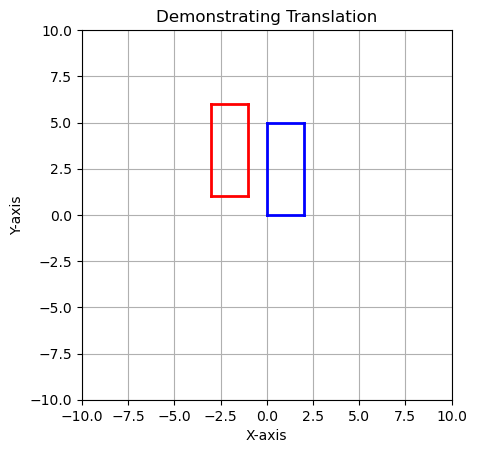

In [228]:


# Define coordinates for the rectangular shape
coords = np.array([[0,0,1],[0,5,1], [2,5,1], [2,0,1]])



# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='b', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='b', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='b', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='b', linewidth=2)  

mat = np.array([[1,0,-3],
                [0,1,1],
                [0,0,1]])
coords = twoDhomog(mat, coords)
                
# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='r', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='r', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='r', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='r', linewidth=2)                  

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Demonstrating Translation')

                

# Set x and y axis limits
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# Set aspect ratio to 'equal' to make the grid square
plt.gca().set_aspect('equal', adjustable='box')
# Display the plot
plt.grid(True)
plt.show()

##  Rigid
The matrix for this is
                $$  \begin{bmatrix}
                \cos\theta      & -\sin\theta  & t_x \\
                \sin\theta       & \cos\theta  & t_y  \\
                0        & 0   & 1  
            \end{bmatrix} $$   

or
                $$  \begin{bmatrix}
                \textbf{R}& \textbf{t} \\
                \textbf{0}^{\top}       & 1 
            \end{bmatrix} $$
or
    $$[\textbf{R} | \textbf{t}]_{2\times3}$$

$\textbf{R}$ is a rotation matrix and is an orthogonal (orthonormal) matrix. i.e. $\textbf{R}\textbf{R}^{\top} = \textbf{R}^{\top}\textbf{R} = \textbf{I}$ and $|\textbf{R}| = 1$. 
$\theta$ is assumed to be in an anti-clockwise direction.


[patrickJMT video on rotation of points](https://www.youtube.com/watch?v=OYuoPTRVzxY)


[Gilbert Strang - Orthogonal Matrices](https://www.youtube.com/watch?v=uNsCkP9mgRk&list=PLE7DDD91010BC51F8&index=17)
            

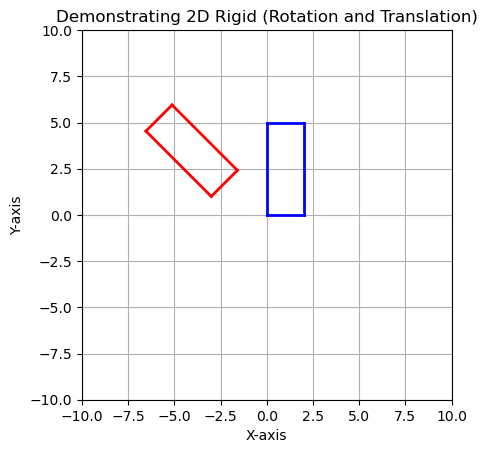

In [230]:

# Define coordinates for the rectangular shape
coords = np.array([[0.0,0.0,1.0],[0.0,5.0,1.0], [2.0,5.0,1.0], [2.0,0.0,1.0]])



# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='b', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='b', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='b', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='b', linewidth=2)  

theta = np.pi/4
mat = np.array([[np.cos(theta),-np.sin(theta),-3],
               [np.sin(theta),np.cos(theta),1],
                [0,0,1.0]])

coords = twoDhomog(mat, coords)

                
# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='r', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='r', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='r', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='r', linewidth=2)                  

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Demonstrating 2D Rigid (Rotation and Translation)')

                

# Set x and y axis limits
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# Set aspect ratio to 'equal' to make the grid square
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.grid(True)
plt.show()

## Similarity
The matrix for this is 
$$  \begin{bmatrix}
                s \cos\theta      & -s \sin\theta  & t_x \\
                s \sin\theta       & s \cos\theta  & t_y  \\
                0        & 0   & 1  
            \end{bmatrix} $$   

or
$$  \begin{bmatrix}
                s\textbf{R}& \textbf{t} \\
                \textbf{0}^{\top}       & 1 
            \end{bmatrix} $$

or
$$[ \ s\textbf{R} \ | \ \textbf{t} \ ]_{2\times3}$$

Where $s$ is the scale factor.

 

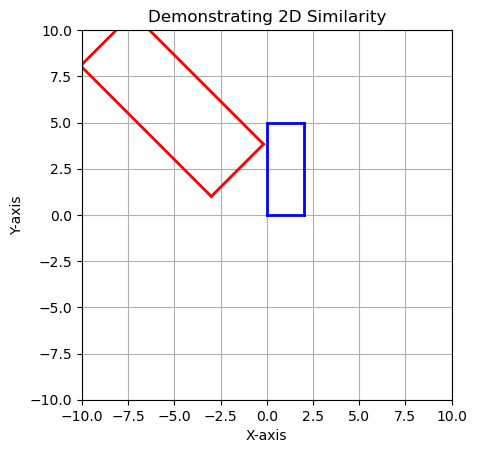

In [234]:

# Define coordinates for the rectangular shape
coords = np.array([[0.0,0.0,1.0],[0.0,5.0,1.0], [2.0,5.0,1.0], [2.0,0.0,1.0]])



# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='b', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='b', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='b', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='b', linewidth=2)  

scale = 2
theta = np.pi/4
mat = np.array([[scale*np.cos(theta),-scale*np.sin(theta),-3],
               [scale*np.sin(theta),scale*np.cos(theta),1],
                [0,0,1.0]])
coords = twoDhomog(mat, coords)

                
# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='r', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='r', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='r', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='r', linewidth=2)                  

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Demonstrating 2D Similarity')

                

# Set x and y axis limits
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# Set aspect ratio to 'equal' to make the grid square
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.grid(True)
plt.show()

## Affine
The matrix for this is 
$$  \begin{bmatrix}
               a_{11}     & a_{12}  & t_x \\
                a_{21}       & a_{22}  & t_y  \\
                0        & 0   & 1  
            \end{bmatrix} $$   

or

$$  \begin{bmatrix}
                \textbf{A}& \textbf{t} \\
                \textbf{0}^{\top}       & 1 
            \end{bmatrix} $$

or
$$[ \ \textbf{A} \ \textbf{t} \ ]_{2\times3}$$




### SVD of Affine

Using Singular Value Decomposition, $\textbf{A}$ can be broken down into $\textbf{A} = \textbf{R}(\theta)\textbf{R}(-\phi)\textbf{D}\textbf{R}(\phi)$ where 
$$D= \begin{bmatrix}
               \sigma_1    & 0  \\
                0       & \sigma_2 
            \end{bmatrix} $$

In words, rotate ($\phi$) so as to line up it's Eigen vectors with the x-y axis. 
Scale it by the $\sigma_1$ in the x direction and by $\sigma_2$ in the y direction. Now rotate it back ($-\phi$) to the original angle and then rotate to the desired angle ($\theta$).   


[See Hartley and Zisserman for more](https://tinyurl.com/ztphphpc)
  

[[-3.   1.   1. ]
 [ 3.5  3.5  1. ]
 [ 4.5  4.9  1. ]
 [-2.   2.4  1. ]]


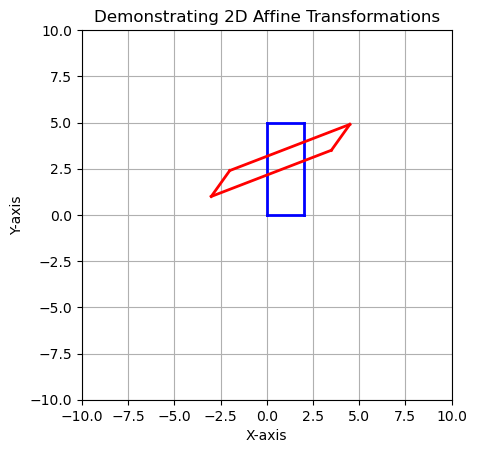

In [237]:

# Define coordinates for the rectangular shape
coords = np.array([[0.0,0.0,1.0],[0.0,5.0,1.0], [2.0,5.0,1.0], [2.0,0.0,1.0]])



# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='b', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='b', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='b', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='b', linewidth=2)  


mat = np.array([[0.5,1.3,-3],
               [0.7,0.5,1],
                [0,0,1.0]])
coords = twoDhomog(mat, coords)
print(coords)

                
# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='r', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='r', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='r', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='r', linewidth=2)                  

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Demonstrating 2D Affine Transformations')

                

# Set x and y axis limits
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# Set aspect ratio to 'equal' to make the grid square
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.grid(True)
plt.show()

## Projective
The matrix for this is 

$$  \begin{bmatrix}
               h_{11}     & h_{12}  & h_{13} \\
               h_{21}     & h_{22}  & h_{23}  \\
               h_{31}     & h_{32}  & h_{33}      
            \end{bmatrix} $$   

or
$$[ \ \textbf{H}  \ ]_{3\times3}$$

[[1.25       1.25       1.        ]
 [3.96226415 1.32075472 1.        ]
 [3.41772152 0.93670886 1.        ]
 [2.05882353 0.41176471 1.        ]]


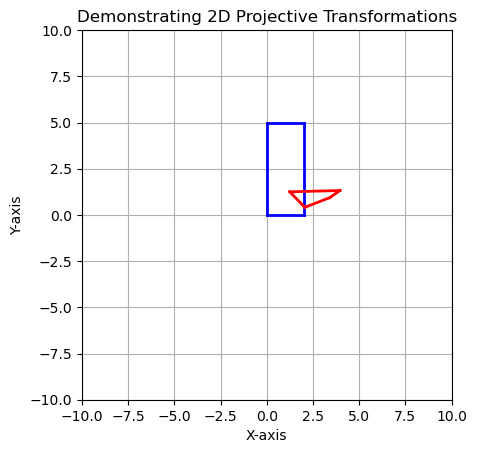

In [238]:

# Define coordinates for the rectangular shape
coords = np.array([[0.0,0.0,1.0],[0.0,5.0,1.0], [2.0,5.0,1.0], [2.0,0.0,1.0]])



# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='b', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='b', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='b', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='b', linewidth=2)  


mat = np.array([[3,4,1.0],
               [0.2,1.2,1.0],
                [1.3,0.9,0.8]])
coords = twoDhomog(mat, coords)
print(coords)

                
# Plot the rectangle using four lines
plt.plot([coords[0][0], coords[1][0]],  [coords[0][1], coords[1][1]], color='r', linewidth=2)  
plt.plot([coords[1][0], coords[2][0]],  [coords[1][1], coords[2][1]], color='r', linewidth=2)  
plt.plot([coords[2][0], coords[3][0]],  [coords[2][1], coords[3][1]], color='r', linewidth=2) 
plt.plot([coords[3][0], coords[0][0]],  [coords[3][1], coords[0][1]], color='r', linewidth=2)                  

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Demonstrating 2D Projective Transformations')

                

# Set x and y axis limits
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Set aspect ratio to 'equal' to make the grid square
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.grid(True)
plt.show()

 


## Going forwards or backwards?

It seems to make sense that whatever our transformation, we would take each input pixel coordinate, transform it with the matrix to find it's destination in the new image and transfer the brightness to there. 
This has problems though. 
Due to quantization and other effects we are not guaranteed to fill every position in the new image. 
This can leave gaps. 




 

The better plan is to start with a coordinate in the output image. Determine where its pixel should be coming from in the input image and copy that over. This way we get no gaps. 
To calculate where an output pixel comes from in the input image you must calculate the inverse of the matrix and multiply that by the output coordinate vector and this will give you the input coordinate vector.

x_frac:0.35328211222070394
y_frac:0.930273337297546
interpolation:46
width: 1000


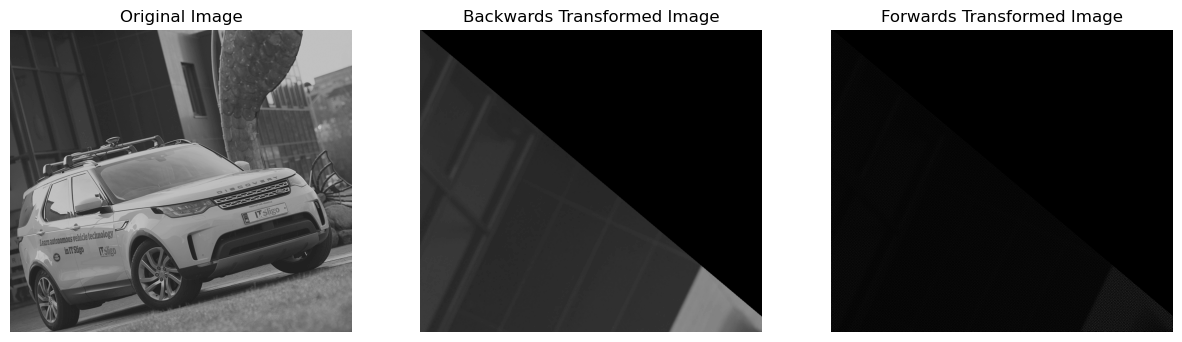

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def apply_transformation_backwards(image, transformation_matrix):
    
    # Get image dimensions
    height, width = image.shape   
    
    # Generate homogeneous coordinates
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    coordinates = np.stack((x.flatten(), y.flatten(), np.ones_like(x).flatten()), axis=1)
    # Apply transformation
    transformed_coordinates = np.dot(coordinates, np.linalg.inv(transformation_matrix.T))
    transformed_coordinates = transformed_coordinates[:, :2].reshape(height, width, 2)
    
    
    # Interpolate values for the transformed coordinates
    transformed_image = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            x_new, y_new = transformed_coordinates[i, j]
            
            if 0 <= x_new < width - 1 and 0 <= y_new < height - 1:
                x_int, y_int = int(x_new), int(y_new)
                x_frac, y_frac = x_new - x_int, y_new - y_int
                #this is doing an interpolation between the four nearest pixels
                
                transformed_image[i, j] = np.uint8((1 - x_frac) * (1 - y_frac) * np.float64(image[y_int, x_int]) + \
                                          (x_frac) * (1 - y_frac) * np.float64(image[y_int, x_int + 1]) + \
                                          (1 - x_frac) * (y_frac) * np.float64(image[y_int + 1, x_int]) + \
                                          (x_frac) * (y_frac) * np.float64(image[y_int + 1, x_int + 1]))
                if i==100 and j==100:
                    print(f'x_frac:{x_frac}')
                    print(f'y_frac:{y_frac}')
                    print(f'interpolation:{np.uint8((1 - x_frac) * (1 - y_frac) * np.float64(image[y_int, x_int]) +(x_frac) * (1 - y_frac) * np.float64(image[y_int, x_int + 1]) + (1 - x_frac) * (y_frac) * np.float64(image[y_int + 1, x_int]) + (x_frac) * (y_frac) * np.float64(image[y_int + 1, x_int + 1]))}')
                    
                    
    return transformed_image


def apply_transformation_forwards(image, transformation_matrix):
    
    # Get image dimensions
    height, width = image.shape
    print(f'width: {width}')
    
    # Generate homogeneous coordinates
    x, y = np.meshgrid(np.arange(width), np.arange(height))
    coordinates = np.stack((x.flatten(), y.flatten(), np.ones_like(x).flatten()), axis=1)
    
    # Apply transformation
   
    transformed_coordinates = np.dot(coordinates, transformation_matrix.T)
    #print(f'transformed_coordinates:{transformed_coordinates}')
    
    transformed_coordinates = transformed_coordinates[:, :2].reshape(height, width, 2)
    
    #print(transformed_coordinates)
    # Interpolate values for the transformed coordinates
    transformed_image = np.zeros_like(image)
    #print(image.shape)
    for i in range(height):
        for j in range(width):
            x_new, y_new = transformed_coordinates[i, j]
            x_new = int(x_new)
            y_new = int(y_new)
            if (0 <= x_new < (width - 1)) and (0 <= y_new < (height - 1)):
                transformed_image[y_new, x_new] = image[i,j]
            
            
            
    return transformed_image


# Load the grayscale image
image_path = "./images/CAV15LowContrast.jpg"  # Change this to the path of your grayscale image
original_image = np.array(Image.open(image_path).convert('L'))

# Define an arbitrary transformation matrix (for example, rotation by 45 degrees)
theta = np.radians(40)
scale =2.5
#Note the translation is in pixels
transformation_matrix = np.array([[scale*np.cos(theta), -scale*np.sin(theta),0],
                                  [scale*np.sin(theta), scale*np.cos(theta),0],
                                 [0,0,1.0]])





# Plot the original and transformed images side by side
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.axis('off')

# Apply the forwards transformation to the image 
transformed_image = apply_transformation_backwards(original_image, transformation_matrix)

plt.subplot(1, 3, 2)
plt.imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
plt.title('Backwards Transformed Image')
plt.axis('off')

# Apply the forwards transformation to the image 
transformed_image = apply_transformation_forwards(original_image, transformation_matrix)

plt.subplot(1, 3, 3)
plt.imshow(transformed_image,  cmap='gray', vmin=0, vmax=255)
plt.title('Forwards Transformed Image')
plt.axis('off')
cv2.imwrite('output.jpg', transformed_image)
plt.show()


## 3D Vectors
Keep in mind the following primary goal.
We want to determine things about the real world by looking at images of the real world.
An image is a 2D representation of the world taken from a specific point of view. 
So we need to understand the world coordinate system, the image coordinate system and the transformation between the two. 
We will start by describing the world coordinate system and how objects in that system can move and change i.e. 3D transformations. 


When we get to camera views you will also need to consider relative movement. e.g. an image of an object, rotating the camera clockwise will result in the image of the object rotating anti-clockwise.
If we wish to describe the position of a point in the world we will need three coordinates. $(x,y,z)^{\top}$.
To describe how a 3D point would change under 3D transformations we will once again use homogeneous coordinates changing the 3D coordinate to $(x,y,z,1)^{\top}$

 

## Translation
The matrix for this is 

$$  \begin{bmatrix}
                1      & 0  & 0 & t_x \\
                0       & 1  & 0 &t_y  \\
                0       & 0  & 1 &t_z  \\
                0        & 0   & 0 & 1  
            \end{bmatrix} $$   

or


$$  \begin{bmatrix}
                \textbf{I} & \textbf{t} \\
                \textbf{0}^{\top}       & 1 
\end{bmatrix} $$

or

$$[\textbf{I} | \textbf{t}]_{3\times4}$$

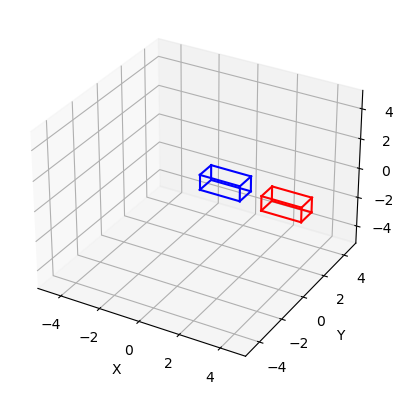

In [353]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np



# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the cube
vertices = np.array([[0, 0, 0, 1],
                     [2, 0, 0, 1],
                     [2, 1, 0, 1],
                     [0, 1, 0, 1],
                     [0, 0, 1, 1],
                     [2, 0, 1, 1],
                     [2, 1, 1, 1],
                     [0, 1, 1, 1]])

# Define the edges of the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='b')

    
mat = [ [1,0,0,2],
        [0,1,0,2],
        [0,0,1,2],
        [0,0,0,1]]

vertices = threeDhomog(mat, vertices)

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='r')
    
# Set the axes limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


## Rigid
The matrix for this is 
$$  \begin{bmatrix}
                r_{11}     & r_{12} & r_{13} & t_x \\
                r_{21}     & r_{22} & r_{23} & t_y \\
                r_{31}     & r_{32} & r_{33} & t_z \\
                0        & 0  &  & 1  
\end{bmatrix} $$   

or

$$  \begin{bmatrix}
                \textbf{R}& \textbf{t} \\
                \textbf{0}^{\top} & 1 
            \end{bmatrix} $$

or

$$[\textbf{R}|\textbf{t}]_{3\times4}$$

$\textbf{R}$ is a rotation matrix and is an orthogonal (orthonormal) matrix. i.e. $\textbf{R}\textbf{R}^{\top} = \textbf{R}^{\top}\textbf{R} = \textbf{I}$ and $|\textbf{R}| = 1$. 
Note we haven't parameterised this yet. 
That's because it is much more difficult than in the 2D case. 

Here we will require three angles (one for each axis). 
So we will leave the parameterisation for the next section.

[[ 0.85355339 -0.14644661  0.5         2.        ]
 [ 0.5         0.5        -0.70710678  2.        ]
 [-0.14644661  0.85355339  0.5         2.        ]
 [ 0.          0.          0.          1.        ]]


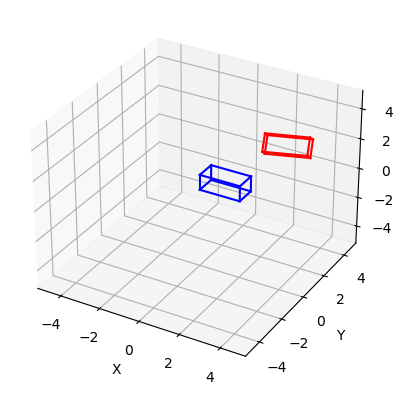

In [369]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

def threeDhomog(mat, vertices):
    for i in range (0,8):
        vertices[i] = np.matmul(mat, vertices[i])
        for j in range (0,4):
            vertices[i][j] = vertices[i][j]/vertices[i][3]
    return vertices

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the cube
vertices = np.array([[0, 0, 0, 1],
                     [2, 0, 0, 1],
                     [2, 1, 0, 1],
                     [0, 1, 0, 1],
                     [0, 0, 1, 1],
                     [2, 0, 1, 1],
                     [2, 1, 1, 1],
                     [0, 1, 1, 1]], np.float64)

# Define the edges of the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='b', alpha=1.0)

# Individual Euler angle matrices
    Alpha = 45
    Beta = 45
    Gamma = 45


    alphaRot = np.array([[1,0,0,0],
       [0,math.cos(math.pi*Alpha/180),-math.sin(math.pi*Alpha/180),0],
       [0,math.sin(math.pi*Alpha/180),math.cos(math.pi*Alpha/180),0],
       [0,0,0,1]])
    betaRot = np.array([[math.cos(math.pi*Beta/180),0,math.sin(math.pi*Beta/180),0],
       [0,1,0,0],
       [-math.sin(math.pi*Beta/180),0,math.cos(math.pi*Beta/180),0],
       [0,0,0,1]])
    gammaRot = np.array([
       [math.cos(math.pi*Gamma/180),-math.sin(math.pi*Gamma/180),0,0],
       [math.sin(math.pi*Gamma/180),math.cos(math.pi*Gamma/180),0,0],
        [0,0,1,0],
       [0,0,0,1]])
    # Full rotation matrix but keep in mind that changing the order will change the rotation.
    #rot =  alphaRot  @ betaRot @  gammaRot
    rot =  betaRot @ alphaRot  @ gammaRot
    
    
mat = [[1,0,0,2],
       [0,1,0,2],
        [0,0,1,2],
       [0,0,0,1]]
mat =    mat @ rot
print(mat)

vertices = threeDhomog(mat, vertices)

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='r', alpha=1.0)
    
# Set the axes limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


## Similarity, scaled rotation
The matrix for this is 
$$  \begin{bmatrix}
                sr_{11}     & sr_{12} & sr_{13} & t_x \\
                sr_{21}     & sr_{22} & sr_{23} & t_y \\
                sr_{31}     & sr_{32} & sr_{33} & t_z \\
                0        & 0  & 0 & 1  
\end{bmatrix} $$   

or
$$  \begin{bmatrix}
                s\textbf{R}& \textbf{t} \\
                \textbf{0}^{\top}       & 1 
\end{bmatrix} $$

or

$$[s\textbf{R}|\textbf{t}]_{3\times4}$$

Where $s$ is the scale factor.

[[ 1.         -1.          1.41421356  1.        ]
 [ 1.70710678  0.29289322 -1.          3.        ]
 [ 0.29289322  1.70710678  1.         -2.        ]
 [ 0.          0.          0.          1.        ]]


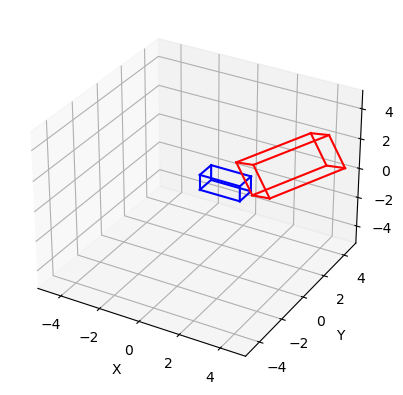

In [368]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

def threeDhomog(mat, vertices):
    for i in range (0,8):
        vertices[i] = np.matmul(mat, vertices[i])
        for j in range (0,4):
            vertices[i][j] = vertices[i][j]/vertices[i][3]
    return vertices

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the cube
vertices = np.array([[0, 0, 0, 1],
                     [2, 0, 0, 1],
                     [2, 1, 0, 1],
                     [0, 1, 0, 1],
                     [0, 0, 1, 1],
                     [2, 0, 1, 1],
                     [2, 1, 1, 1],
                     [0, 1, 1, 1]], np.float64)

# Define the edges of the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='b', alpha=1.0)

# Individual Euler angle matrices
    Alpha = 45
    Beta = 45
    Gamma = 45


    alphaRot = np.array([[1,0,0,0],
       [0,math.cos(math.pi*Alpha/180),-math.sin(math.pi*Alpha/180),0],
       [0,math.sin(math.pi*Alpha/180),math.cos(math.pi*Alpha/180),0],
       [0,0,0,1]])
    betaRot = np.array([[math.cos(math.pi*Beta/180),0,math.sin(math.pi*Beta/180),0],
       [0,1,0,0],
       [-math.sin(math.pi*Beta/180),0,math.cos(math.pi*Beta/180),0],
       [0,0,0,1]])
    gammaRot = np.array([
       [math.cos(math.pi*Gamma/180),-math.sin(math.pi*Gamma/180),0,0],
       [math.sin(math.pi*Gamma/180),math.cos(math.pi*Gamma/180),0,0],
        [0,0,1,0],
       [0,0,0,1]])
    # Full rotation matrix but keep in mind that changing the order will change the rotation.
    rot =  alphaRot  @ betaRot @  gammaRot
    #rot =  betaRot @ alphaRot  @ gammaRot
    
scale = 2
    
mat = [[scale,0,0,1],
       [0,scale,0,3],
        [0,0,scale,-2],
      [0,0,0,1]]
mat =    mat @ rot
print(mat)

vertices = threeDhomog(mat, vertices)

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='r', alpha=1.0)
    
# Set the axes limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


## Affine
The matrix for this is 
$$\begin{bmatrix}
               a_{11}     & a_{12}  & a_{13} & t_x \\
                a_{21}     & a_{22}  & a_{23} & t_y  \\
                a_{31}     & a_{32}  & a_{33} & t_z  \\
                0        & 0 & 0   & 1  
\end{bmatrix} $$   

or

$$\begin{bmatrix}
                \textbf{A}& \textbf{t} \\
                \textbf{0}^{\top}       & 1 
\end{bmatrix} $$

or

$$[\textbf{A}\textbf{t}]_{3\times4}$$

[[1.1, 0.5, 0.8, 0], [1.2, 1.3, 1.5, 0], [1.1, 1.0, 1.3, 0], [0, 0, 0, 1]]


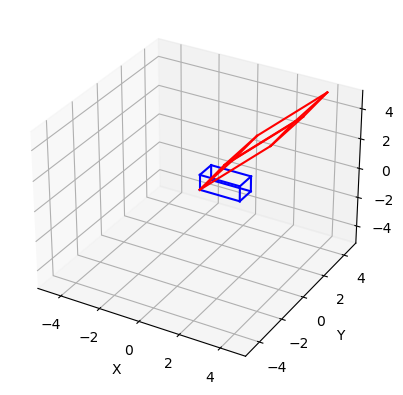

In [364]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

def threeDhomog(mat, vertices):
    for i in range (0,8):
        vertices[i] = np.matmul(mat, vertices[i])
        for j in range (0,4):
            vertices[i][j] = vertices[i][j]/vertices[i][3]
    return vertices

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the cube
vertices = np.array([[0, 0, 0, 1],
                     [2, 0, 0, 1],
                     [2, 1, 0, 1],
                     [0, 1, 0, 1],
                     [0, 0, 1, 1],
                     [2, 0, 1, 1],
                     [2, 1, 1, 1],
                     [0, 1, 1, 1]], np.float64)

# Define the edges of the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='b', alpha=1.0)

# Individual Euler angle matrices
    Alpha = 45
    Beta = 45
    Gamma = 45


    alphaRot = np.array([[1,0,0,0],
       [0,math.cos(math.pi*Alpha/180),-math.sin(math.pi*Alpha/180),0],
       [0,math.sin(math.pi*Alpha/180),math.cos(math.pi*Alpha/180),0],
       [0,0,0,1]])
    betaRot = np.array([[math.cos(math.pi*Beta/180),0,math.sin(math.pi*Beta/180),0],
       [0,1,0,0],
       [-math.sin(math.pi*Beta/180),0,math.cos(math.pi*Beta/180),0],
       [0,0,0,1]])
    gammaRot = np.array([
       [math.cos(math.pi*Gamma/180),-math.sin(math.pi*Gamma/180),0,0],
       [math.sin(math.pi*Gamma/180),math.cos(math.pi*Gamma/180),0,0],
        [0,0,1,0],
       [0,0,0,1]])
    # Full rotation matrix but keep in mind that changing the order will change the rotation.
    rot =  alphaRot  @ betaRot @  gammaRot
    #rot =  betaRot @ alphaRot  @ gammaRot
    

    
mat = [[1.1,0.5,0.8,0],
       [1.2,1.3,1.5,0],
        [1.1,1.0,1.3,0],
      [0,0,0,1]]
mat =    mat #@ rot
print(mat)

vertices = threeDhomog(mat, vertices)

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='r', alpha=1.0)
    
# Set the axes limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


## Projective
The matrix for this is 
$$  \begin{bmatrix}[r]
               h_{11}     & h_{12}  & h_{13} & h_{14} \\
               h_{21}     & h_{22}  & h_{23} & h_{24}\\
               h_{31}     & h_{32}  & h_{33} & h_{34}\\
               h_{41}     & h_{42}  & h_{43} & h_{44}
\end{bmatrix} $$   

or

$$[ \ \textbf{H}  \ ]_{4\times4}$$

Projective is very important to us because it relates the 3D coordinates to a point-of-view, otherwise known as a centre of projection, i.e. where the camera was positioned when it took an image. 
We will be discussing this a lot throughout the module. 
  

[[1, 1.7, 0.8, 1.1], [1.2, 1.3, 1.5, 1.6], [1.1, 0.4, 1.3, 1.8], [0.3, 0.3, 0.4, 1]]


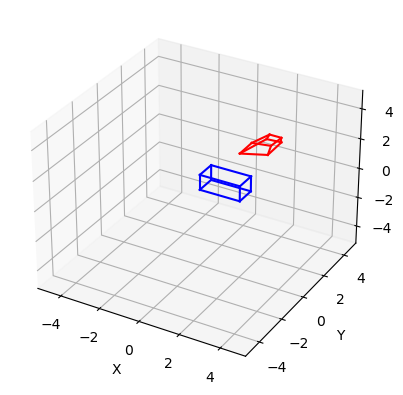

In [366]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

def threeDhomog(mat, vertices):
    for i in range (0,8):
        vertices[i] = np.matmul(mat, vertices[i])
        for j in range (0,4):
            vertices[i][j] = vertices[i][j]/vertices[i][3]
    return vertices

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the vertices of the cube
vertices = np.array([[0, 0, 0, 1],
                     [2, 0, 0, 1],
                     [2, 1, 0, 1],
                     [0, 1, 0, 1],
                     [0, 0, 1, 1],
                     [2, 0, 1, 1],
                     [2, 1, 1, 1],
                     [0, 1, 1, 1]], np.float64)

# Define the edges of the cube
edges = [(0, 1), (1, 2), (2, 3), (3, 0),
         (4, 5), (5, 6), (6, 7), (7, 4),
         (0, 4), (1, 5), (2, 6), (3, 7)]

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='b', alpha=1.0)

# Individual Euler angle matrices
    Alpha = 45
    Beta = 45
    Gamma = 45


    alphaRot = np.array([[1,0,0,0],
       [0,math.cos(math.pi*Alpha/180),-math.sin(math.pi*Alpha/180),0],
       [0,math.sin(math.pi*Alpha/180),math.cos(math.pi*Alpha/180),0],
       [0,0,0,1]])
    betaRot = np.array([[math.cos(math.pi*Beta/180),0,math.sin(math.pi*Beta/180),0],
       [0,1,0,0],
       [-math.sin(math.pi*Beta/180),0,math.cos(math.pi*Beta/180),0],
       [0,0,0,1]])
    gammaRot = np.array([
       [math.cos(math.pi*Gamma/180),-math.sin(math.pi*Gamma/180),0,0],
       [math.sin(math.pi*Gamma/180),math.cos(math.pi*Gamma/180),0,0],
        [0,0,1,0],
       [0,0,0,1]])
    # Full rotation matrix but keep in mind that changing the order will change the rotation.
    rot =  alphaRot  @ betaRot @  gammaRot
    #rot =  betaRot @ alphaRot  @ gammaRot
    

    
mat = [[1,1.7,0.8,1.1],
       [1.2,1.3,1.5,1.6],
        [1.1,0.4,1.3,1.8],
      [0.3,0.3,0.4,1]]
mat =    mat #@ rot
print(mat)

vertices = threeDhomog(mat, vertices)

# Plot the edges of the cube
for edge in edges:
    ax.plot3D(vertices[edge, 0], vertices[edge, 1], vertices[edge, 2], color='r', alpha=1.0)
    
# Set the axes limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


## 3D rotations

2D rotations are relatively straight forward but 3D rotations are not. There are three angles involved.
If we take the $3\times3$ rotation matrix $\textbf{R}$ we have nine unknowns arising from three degrees of freedom. 
If we try to determine these unknowns by the usual methods e.g. least squares etc. we have a problem. 
We can certainly find a result for the nine unknowns but how do we ensure that the resulting $\textbf{R}$ is orthogonal and has determinant of +1?

### Separate Rotation around each axis

$$ R^x_{\alpha} = \begin{bmatrix}
                1     & 0 & 0 \\
                0     & cos\alpha & -sin\alpha\\
                0     & sin\alpha & cos\alpha
\end{bmatrix} $$   

$$ R^y_{\beta} = \begin{bmatrix}
               cos\beta     & 0 & sin\beta \\
                0     & 1& 0\\
                -sin\beta    & 0 & cos\beta
\end{bmatrix} $$   

$$ R^z_{\gamma} = \begin{bmatrix}
                cos\gamma & -sin\gamma & 0\\
                 sin\gamma & cos\gamma & 0\\
                0    & 0 & 1
\end{bmatrix} $$   

Where $\alpha, \beta, \gamma$ are called Euler Angles. To get any combination of rotations we multiply the appropriate matrices together. But therein lies the problem. In what order should we multiply them.



$R^x_{\alpha}R^y_{\beta} \neq R^y_{\beta}R^x_{\alpha}$.

## Other rotation issues
There are other issues too. 
Moving through the parameter space $(\alpha,\beta, \gamma)$ is not always smooth. 
There are strict mathematical definitions for smoothness but in practice what this means is that small changes in overall movement do not always lead to small changes in each of the separate parameters. Sometimes a small change will require a very large change in one of the Euler angles. 

  
## Euler Angles
This is not to suggest that Euler angles are of no use. 
In particular where simple known rotations are required, perhaps between two fixed camera positions then simple rotations can be employed between the two views.
However in the general case we would like a better method.
Without getting too deep into the mathematics of vector spaces, the space of rotation matrices is not linear under addition. 
A common solution to this is to change to another space, which is linear, move about in that space and then move back.
  


## Smooth Path
We would also like to determine a smooth path between two views rather than just determining the full rotations that will lead from one to the other. 
For example, the path that a camera took to get from one position/orientation to another is particularly useful when the views all come from one camera, which only takes an image at some sample period, and we may wish to interpolate between these.

  

## Linear groups $GL(n)$ and $SL(n)$
Certain sets of linear transformations form a Group. \\
A group is a set $G$ with an operation $\circ:G \circ G \rightarrow G$ such that 


- $g_1 \circ g_2 \in G \text{ } \forall g_1,g_2  \in G$     **closed**
- $(g_1 \circ g_2)\circ g_3 = g_1\circ (g_2 \circ g_3) \text{ } \forall g_1,g_2,g_3 \in G$   **associative**
- $\exists e \in G: e \circ g = g \circ e = g \text{ } \forall g \in G$   **neutral**
- $\exists g^{-1} \in G: g \circ g^{-1} = g^{-1} \circ g = e \text{ } \forall g \in G$   **inverse**
    

  

## Linear groups $GL(n)$ and $SL(n)$

e.g. All invertible (non-singular) real $n \times n$-matrices form a group w.r.t matrix multiplication.

This group is called the General Linear Group $GL(n)$.

It consists of all $A \in \mathcal{M}(n)$ for which $det(A) \neq 0$.

All matrices $A \in GL(n)$ for which $det(A) = 1$ form a group called the Special Linear Group $SL(n)$.

The inverse of $A$ is also in this group as $det(A^{-1}) = det(A)^{-1}$
  

## Matrix representation of Groups
Groups can be represented by a matrix, e.g. the set of rotations form a group.
$$R: G \rightarrow GL(n)$$

$R(0) = I_{n \times n}$ and $R(g \circ h) = R(g)R(h)$ $\forall g,h \in G$

Such a map $R$ is called a group homomorphism.

##  The Affine Group $A(n)$

An affine transformation $L:\mathbb{R}^n \rightarrow \mathbb{R}^n$ is defined by a matrix $A \in GL(n)$ and a vector $b \in \mathbb{R}^n$ such that $L(x) = Ax+b$.

Note: $L$ is not a linear map unless $b=0$.

By introducing homogeneous coordinates to represent $x\in \mathbb{R}^n$ by $\begin{pmatrix} x \\ 1   
\end{pmatrix} \in \mathbb{R}^{n+1}$ then $L$ becomes a linear mapping.

From $L:\mathbb{R}^{n+1} \rightarrow \mathbb{R}^{n+1};$ $\begin{pmatrix} x \\ 1 \end{pmatrix} \rightarrow \begin{pmatrix} A & b \\ 0 & 1 \end{pmatrix}\begin{pmatrix} x \\ 1 \end{pmatrix} = \begin{pmatrix} Ax+b \\ 1 \end{pmatrix}$

$\begin{pmatrix} A & b \\ 0 & 1 \end{pmatrix}$ where $A \in GL(n)$ and $b \in \mathbb{R}^n$ is called an Affine matrix.
It is an element of $GL(n+1)$.

The Affine matrices form a subgroup of $GL(n+1)$.

## Orthogonal Group $O(n)$

The matrix $A \in \mathcal{M}(n)$ is called orthogonal if it preserves the inner product i.e. $\langle Ax,Ay \rangle = \langle x,y \rangle$ $\forall x,y \in \mathbb{R}^n$.

The set of all orthogonal matrices form the orthogonal group $O(n)$ which is a subgroup of $GL(n)$.\\ For an orthogonal matrix $R$ we have

$\langle Rx,Ry \rangle = x^{\top}R^{\top}Ry = x^{\top}y$ $\forall x,y \in \mathbb{R}^n$.

Therefore we must have $R^{\top}R = RR^{\top} = I$
in other words $O(n) = \{R \in GL(n)|R^{\top}R = I\}$.

## Orthogonal Group $O(n)$

The above identity shows that for any orthogonal matrix $R$ we have $det(R^{\top}R) = (det(R))^2 = det(I) = 1$ such that $det(R) \in \{\pm 1\}$

The subgroup of $O(n)$ with $det(R) = +1$ is called the Special Orthogonal Group $SO(n)$.

$SO(n) = O(n) \cap SL(n)$. 

In particular $SO(3)$ is the group of all 3-dimensional rotation matrices.

## The Euclidean Group $E(n)$
A euclidean transformation $L$ from $\mathbb{R}^n$ to $\mathbb{R}^n$ is defined by an orthogonal matrix $R \in O(n)$ and a vector $t \in \mathbb{R}^n$

$L: \mathbb{R}^n \rightarrow \mathbb{R}^n;$ $ x \rightarrow Rx + t$ **mirror/rotation & translation**

The set of all such transformations is called the Euclidean Group $E(n)$. 
It is a subgroup of the Affine Group $A(n)$. 
Embedded by homogeneous coordinates we get. 

$$E(n) = \left \{ \begin{pmatrix} R & t \\ 0 & 1 \end{pmatrix} \middle | R \in O(n), t \in \mathbb{R}^n\right \}$$

If $R \in SO(n)$ i.e. $det(R) = 1$ then we have the special Euclidean Group. 
In particular $SE(3)$ represents the rigid body motions in $\mathbb{R}^3$, i.e. rotation and translation in 3 dimensional space.

##  In Summary

$SO(n) \subset O(n) \subset GL(n);$ 

$SE(n) \subset E(n) \subset A(n) \subset GL(n+1)$
  

## Skew-symmetric Matrices
A matrix $A \in \mathbb{R}^{n \times n}$ is called skew-symmetric or anti-symmetric if $A^{\top} = -A$. 
In a skew-symmetric matrix the diagonal entries are all zero. 

If $A$ is a real skew-symmetric matrix then

1. All eigen values of $A$ are either zero or purely imaginary i.e. of the form $i\omega$ with $i^2 = -1, \omega \in \mathbb{R}$.
2. There exists an orthogonal matrix $V$ such that $A=V\Sigma V^{\top}$ where $\Sigma$ is a block-diagonal matrix. $\Sigma = diag \{A_1,...., A_m, 0,...0\}$ with real skew-symmetric matrices $A_i$ of the form
    $$ A_i = \begin{pmatrix} 0 & a_i \\ -a_i & 0 \end{pmatrix} \in \mathbb{R}^{2 \times 2} \text{ } i = 1,...., m$$
    in particular, the rank of any skew-symmetric matrix is \textbf{even}.

  

## Skew-symmetric Matrices
A matrix $A \in \mathbb{R}^{n \times n}$ is called skew-symmetric or anti-symmetric if $A^{\top} = -A$. 
In a skew-symmetric matrix the diagonal entries are all zero. 
If $A$ is a real skew-symmetric matrix then:

All eigen values of $A$ are either zero or purely imaginary i.e. of the form $i\omega$ with $i^2 = -1, \omega \in \mathbb{R}$.
    
In computer vision, a common Skew-symmetric matrix given by the $_\times$ operation of a vector $u \in \mathbb{R}^3$ is:
$$u_{\times} = \begin{pmatrix} 0 & -u_3 & u_2\\ u_3 & 0 & -u_1\\ -u_2 & u_1 & 0 \end{pmatrix} \in \mathbb{R}^{3 \times 3}$$

This is a linear operator from the space of vectors $\mathbb{R}^3$ to the space of skew-symmetric matrices in $\mathbb{R}^{3 \times 3}$. 

In particular, the matrix $u_{\times}$ has the property that $u_{\times}v = u \times v$ where $\times$ denotes the standard vector cross product in $\mathbb{R}^3$.  

[$u \times v = |u||v|sin(\theta)n$](https://en.wikipedia.org/wiki/Cross_product)

For $u \neq 0$, we have $rank(u_{\times})=2$ and the null space of $u_{\times}$ is spanned by $u$, because the cross product of a vector with itself is zero $u_{\times}u = u^{\top}u_{\times}=0$.



All well and good but what's the point? 
Well the cross product is not a straight forward Linear Algebra operation but can be encoded as one by changing it to a skew-symmetric matrix and so can be replaced in Linear Algebra operations allowing us to do all the standard manipulation for formulae that we do.

In turn every skew symmetric matrix $A=-A^{\top} \in \mathbb{R}^{3 \times 3}$ can be identified with a vector $v \in \mathbb{R}^3$ and the space $so(3)$ of all $3 \times 3$ skew-symmetric matrices. 

Uppercase $SO(3)$ is a lie group; lowercase $so(3)$ is its lie Algebra.
 
   
 
 

 
## Rigid body motion
Rigid body motion is a family of maps.
$$g_t: \mathbb{R}^3 \rightarrow \mathbb{R}^3; X \rightarrow g_t(X), t \in [0,T]$$
which preserve the norm and cross product of any two vectors.


- $|g_t(v)|=|v|, \ \ \forall v \in \mathbb{R}^3$
- $g_t(u) \times g_t(v) = g_t(u \times v) \ \ \forall u,v \in \mathbb{R}^3$

 
Since norm and Scalar Product are related to the polarisation identity.
$$\langle u,v \rangle = \frac{1}{4} (|u + v|^2 - |u - v|^2)$$

One can also state that a rigid-body motion is a map which preserves the inner product & cross product. 

Note: Scalar product, inner product, and dot product are all names for the same operation.
   

 
 
 
## Triple Product
As a consequence, rigid body motions also preserve the triple product.

$$\langle g_t(u), g_t(v) \times g_t(w) \rangle = \langle u,v \times w \rangle, \forall u,v,w \in \mathbb{R}^3$$
Which means they are volume-preserving.
Since it preserves lengths & orientation, the motion of $g_t$ of a rigid body is sufficiently defined by specifying the motion of a cartesian coordinate frame attached to the object (given by the origin and orthonormal oriented vectors $e_1,e_2, e_3 \in \mathbb{R}^3$). 

The motion of the origin can be represented by a translation $T \in \mathbb{R}^3$, whereas the transformation of the vectors $e_i$ is given by new vectors $r_i = g_t(e_i)$.
  
 
 


Scalar and cross-product of these vectors are preserved.
    $$r_i^{\top}r_j = g_t(e_i)^{\top}g_t(e_j) = e_i^{\top}e_j = \delta_{ij} \text{ and } r_1 \times r_2 = r_3$$
    
The first constraint amounts to the statement that the matrix $R=(r_1,r_2,r_3)$ is an orthogonal (rotation) matrix: 
$R^{\top}R = RR^{\top} = I$, whereas the second property implies that $det(R) = +1$ 

i.e. $R$ is an element of the group $SO(3) = \{R \in \mathbb{R}^{3 \times 3}|R^{\top}R = I, det(R) = +1\}$

Thus rigid body motion can be written as 

$$g_t(x) = Rx + T$$
 

## Exponential coordinates of rotation.

We will now derive a representation of an infinitesimal rotation. 
Consider a family of rotation matrices $R(t)$ which continuously transform a point from its original location $(R(0) = I)$ to a different one.

$$X_t=R(t)X_0 \text{, with } R(t) \in SO(3)$$
Since $R(t)R(t)^{\top} = I \forall t$ we have 

$$\frac{d}{dt}(RR^{\top}) = \dot{R}R^{\top}+R\dot{R}^{\top} = 0 \Rightarrow \dot{R}R^{\top} =-(R\dot{R}^{\top}) =  -(\dot{R}R^{\top})^{\top}$$

i.e. $ \dot{R}R^{\top} = -(\dot{R}R^{\top})^{\top}$

Thus $\dot{R}R^{\top}$ is a skew-symmetric matrix. 


As shown in the section about the $_{\times}$-operator, this implies that there exists a vector $w(t) \in \mathbb{R}^3$ such that,
$$\dot{R}(t)R^{\top}(t) = w_{\times}(t) \Leftrightarrow \dot{R}(t) = w_{\times}R(t)$$

Since $R(0) = I$, it follows that $\dot{R}(0) = w_{\times}(0)$. 
Therefore the skew-symmetric matrix $w_{\times}(0)=so(3)$ gives the first-order approximation of a rotation. 
$$R(dt)=R(0)+dR=I + w_{\times}(0)dt$$

By first-order approximation, we mean a linear approximation.

  



## Lie Group & Lie Algebra

The above calculations showed that the effect of any infinitesimal rotation $R \in SO(3)$ can be approximated by an element from the space of skew-symmetric matrices. $so(3) = \{w_{\times} | w \in \mathbb{R}^3\}$.

The rotation group $SO(3)$ is called a Lie group. 

The space $so(3)$ is called its Lie Algebra.
Definition: A Lie group (or infinitesimal group) is a smooth manifold that is also a group, such that the group operations **multiplication** and **inversion** are smooth maps.

As shown above: the Lie algebra $so(3)$ is the tangent space at the identity of the rotation group $SO(3)$.


An algebra over a field $K$ is a vector space $V$ over $K$ with multiplication on the space $V$. 
Elements $w_{\times}$ and $v_{\times}$ of the Lie algebra generally do not commute. One can define the Lie bracket.
$$[...]:so(3) \times so(3) \rightarrow so(3); [w_{\times},v_{\times}] \equiv w_{\times}v_{\times} - v_{\times}w_{\times}$$ 

This is also skew-symmetric.
  

## The Exponential Map

Given the infinitesimal rotation formulation in terms of the skew-symmetric matrix $w_{\times}$, is it possible to determine a useful representation of the rotation $R(t)$? Let us assume that $w_{\times}$ is constant in time.
The differential equation system.

$$\dot{R}(t) = w_{\times}R(t)$$
$$R(0) = I$$
    
has the solution

$$R(t) = e^{w_{\times}t} = \sum^{\infty}_{n=0} \frac{(w_{\times}t)^n}{n!} = I + w_{\times}t + \frac{(w_{\times}t)^2}{2!}+ \dots$$
which is a rotation around the axis $w \in \mathbb{R}^3$ by an angle of $t$ (if $||w|| = 1$).
  



Alternatively one can absorb the scalar $t \in \mathbb{R}$ into the skew symmetric matrix $w_{\times}$ to obtain $R(t) = e^{v_{\times}}$ with $v_{\times} = w_{\times}t$. 
This matrix exponential, therefore, defines a map from the Lie algebra to the Lie group:
$$exp: so(3) \rightarrow SO(3); w_{\times} \rightarrow e^{w_{\times}}$$
  

## The Logarithm $SO(3)$
As in the case of real analysis, one can define an inverse function to the exponential map by the logarithm. In the context of Lie groups, this will lead to a mapping from the Lie group to the Lie Algebra. For any rotation matrix $R \in e^{w_{\times}}$.

This element is denoted by $w_{\times}=log(R)$. If $R=(r_{ij}) \neq I$ then the appropriate $w$ is given by 
$$t = cos^{-1}\left( \frac{trace(R) -1}{2}\right), w=\frac{1}{2Sin(t)} \begin{pmatrix} r_{32}-r_{23}\\ r_{13}-r_{31}\\r_{21}-r_{12}\end{pmatrix}$$

For $R=I$, we have $t = 0$, i.e. a rotation by an angle of 0. The above statement says: Any orthogonal transformation $R \in SO(3)$ can be realised by rotating by an angle $t$ around an axis $w$ as defined above. We will not prove this statement.
The above representation is not unique since increasing the angle by multiples of $2\pi$ will give the same rotation $R$.
  

## Rodriques Formula
We have seen that any rotation can be realised by computing $R=e^{w_{\times}}$. 

In analogy to the well-known Euler equation.
$$e^{j\theta}=\cos(\theta)+i\sin(\theta),\  \forall \phi \in \mathbb{R}$$

we have an expression for skew-symmetric matrices $w_{\times}\in SO(3)$
$$e^{w_{\times}t} = I + w_{\times}\sin(t)+w_{\times}^2(1-\cos(t))$$


Proof: Let $t=|w|$ and $v=\frac{w}{|w|}$ Then.
$$v_{\times}^2 = vv^{\top} - I, v_{\times}^3=-v_{\times},...$$
and
$$e^{w_{\times}} = e^{w_{\times}t}=I + \underbrace{\left(t-\frac{t^3}{3!}+\frac{t^5}{5!}-\dots \right)}_{\sin(t)}v_{\times}+\underbrace{\left(\frac{t^2}{2!}-\frac{t^4}{4!}+\frac{t^6}{6!}\dots \right)}_{1-\cos(t)}v_{\times}^2$$

  

!["HigherEd 4.0 is funded by the Human Capital Initiative Pillar 3. HCI Pillar 3 supports projects to enhance the innovation and agility in response to future skills needs"](images/HCIFunding.png)